### RESEARCH QUESTION

With the data, I want to see the relationship between the percentage size of land used for organic farming and the death rate due to cancer in the selected EU countries. This relationship will be studied per country for both female and male in these countries.

### DATA DESCRIPTION

1. The cancer_death_data contains the death rate (per annum) due to cancer in the selected EU (and non EU) countries for both female and male genders at different years. The death rate of the population is adjusted to a standard age distribution. 
Data source: https://ec.europa.eu/eurostat/databrowser/view/TPS00116__custom_4986237/default/table?lang=en

2. The organic_farm_area_data contains the percentage of the area under organic farming in EU (and non EU) countries over different years. The indicator measures the share of total utilised agricultural area (UAA) occupied by organic farming (existing organically-farmed areas and areas in process of conversion).
Data source: https://ec.europa.eu/eurostat/databrowser/view/SDG_02_40__custom_4979455/default/table?lang=en



### DATA QUALITY AND QUANTITY INSPECTION

In [57]:
# All the basic module imports
import yaml
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [58]:
# Read the files with config yaml
def grab_config():
    with open('config.yaml', 'r') as sky:
        config = yaml.safe_load(sky)
    return config

config = grab_config()

In [59]:
# Read cancer and organic tsv files using config. The sep='\t' is used to specify the separator.
cancer_death = pd.read_csv(config['cancer_death_data'], sep='\t')
organic_farm_area = pd.read_csv(config['organic_farm_area_data'], sep='\t')

In [60]:
# View cancer data
cancer_death.head()

freq,unit,age,icd10,sex,geo\TIME_PERIOD    2011     2012     2013     2014   \
0                       A,RT,TOTAL,C,F,AT  205.15    206.3   198.24   202.41    
1                       A,RT,TOTAL,C,F,BE  206.39   197.98   200.54   195.93    
2                       A,RT,TOTAL,C,F,BG  170.16   183.25   175.17   178.96    
3                       A,RT,TOTAL,C,F,CH   177.3   178.62    176.4   173.13    
4                       A,RT,TOTAL,C,F,CY  149.65    148.2   151.02   140.36    

     2015     2016     2017      2018      2019   
0  194.97    192.8   187.07   187.97 p  187.17 p  
1  194.39   190.45   188.79   181.95 p  182.62 p  
2  179.27    172.2   172.07   172.48 p  178.07 p  
3  175.41   174.51   170.04   168.25 p  165.85 p  
4  159.52   145.81   159.61   164.45 p  154.71 p

In [61]:
# View organic data
organic_farm_area.head()

freq,unit,crops,agprdmet,geo\TIME_PERIOD  2000   2011    2012    2013   \
0              A,PC_UAA,UAAXK0000,TOTAL,AT  13.8   19.6   18.62   18.40    
1              A,PC_UAA,UAAXK0000,TOTAL,BE   1.5    4.1    4.48    4.67    
2              A,PC_UAA,UAAXK0000,TOTAL,BG     :    0.5    0.76    1.13    
3              A,PC_UAA,UAAXK0000,TOTAL,CH     :      :   11.57   12.19    
4              A,PC_UAA,UAAXK0000,TOTAL,CY     :   2.9 e   3.38    4.03    

    2014    2015    2016    2017    2018    2019   
0  19.35   20.30   21.25   23.37   24.08   25.33   
1   5.00    5.17    5.80    6.28    6.56    6.85   
2   0.96    2.37    3.20    2.72    2.56    2.34   
3  12.73   12.91   13.40   14.37   15.40   16.27   
4   3.63    3.72    4.94    4.61    4.55    4.98

In [62]:
# View cancer data information
cancer_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   freq,unit,age,icd10,sex,geo\TIME_PERIOD  68 non-null     object
 1   2011                                     68 non-null     object
 2   2012                                     68 non-null     object
 3   2013                                     68 non-null     object
 4   2014                                     68 non-null     object
 5   2015                                     68 non-null     object
 6   2016                                     68 non-null     object
 7   2017                                     68 non-null     object
 8   2018                                     68 non-null     object
 9   2019                                     68 non-null     object
dtypes: object(10)
memory usage: 5.4+ KB


The cancer_death data has a total of 10 columns and 68 rows. The datatype of the year columns for the cancer data will be changed from object to int.

In [63]:
# View cancer data information
organic_farm_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   freq,unit,crops,agprdmet,geo\TIME_PERIOD  34 non-null     object
 1   2000                                      34 non-null     object
 2   2011                                      34 non-null     object
 3   2012                                      34 non-null     object
 4   2013                                      34 non-null     object
 5   2014                                      34 non-null     object
 6   2015                                      34 non-null     object
 7   2016                                      34 non-null     object
 8   2017                                      34 non-null     object
 9   2018                                      34 non-null     object
 10  2019                                      34 non-nul

The organic_farm_area data has a total of 11 columns and 34 rows. The datatype of the year columns for the cancer data will be changed from object to int.

### CANCER DATA CLEANING

In [64]:
# Split the first column by comma(,) to produce 6 more columns ["Drop1", "Drop2", "Drop3", "Drop4", "Gender", "Country"]
cancer_death[["Drop1", "Drop2", "Drop3", "Drop4", "Gender", "Country"]] = cancer_death.iloc[:,0].str.split(',', expand=True)

In [65]:
# Check result
cancer_death.head()

freq,unit,age,icd10,sex,geo\TIME_PERIOD    2011     2012     2013     2014   \
0                       A,RT,TOTAL,C,F,AT  205.15    206.3   198.24   202.41    
1                       A,RT,TOTAL,C,F,BE  206.39   197.98   200.54   195.93    
2                       A,RT,TOTAL,C,F,BG  170.16   183.25   175.17   178.96    
3                       A,RT,TOTAL,C,F,CH   177.3   178.62    176.4   173.13    
4                       A,RT,TOTAL,C,F,CY  149.65    148.2   151.02   140.36    

     2015     2016     2017      2018      2019  Drop1 Drop2  Drop3 Drop4  \
0  194.97    192.8   187.07   187.97 p  187.17 p     A    RT  TOTAL     C   
1  194.39   190.45   188.79   181.95 p  182.62 p     A    RT  TOTAL     C   
2  179.27    172.2   172.07   172.48 p  178.07 p     A    RT  TOTAL     C   
3  175.41   174.51   170.04   168.25 p  165.85 p     A    RT  TOTAL     C   
4  159.52   145.81   159.61   164.45 p  154.71 p     A    RT  TOTAL     C   

  Gender Country  
0      F      AT  
1      F      BE  
2      F      BG  
3      F      CH  
4      F      CY

Done. But non-numeric characters are attached to multiple elements in the dataframe. I decided to settle for the period of 5 years (2011 to 2015) for the purpose of this study.

In [66]:
# First, drop all the irrelevant columns (incuding 2016 to 2019) resulting from the previous splits.
cancer_death2 = cancer_death.drop(cancer_death.columns[[0,6,7,8,9, 10,11,12,13]], axis=1)
# See result
cancer_death2.head()

2011     2012     2013     2014     2015  Gender Country
0  205.15    206.3   198.24   202.41   194.97       F      AT
1  206.39   197.98   200.54   195.93   194.39       F      BE
2  170.16   183.25   175.17   178.96   179.27       F      BG
3   177.3   178.62    176.4   173.13   175.41       F      CH
4  149.65    148.2   151.02   140.36   159.52       F      CY

In [67]:
# Then split and remove any non-digit character attached to elements in the dataframe.

# Define a function to split and remove any letter
def split_and_remove_letters(x):
    if isinstance(x, str):
        split_value = x.split()[0]
        if split_value.replace('.', '').isdigit():
            return float(split_value)
    return pd.np.nan

# Apply the function to each element of the dataframe except the last two
cancer_death2.iloc[:, :-2] = cancer_death2.iloc[:, :-2].applymap(split_and_remove_letters)

In [68]:
# check the outcome
cancer_death2.head()

2011    2012    2013    2014    2015  Gender Country
0  205.15   206.3  198.24  202.41  194.97      F      AT
1  206.39  197.98  200.54  195.93  194.39      F      BE
2  170.16  183.25  175.17  178.96  179.27      F      BG
3   177.3  178.62   176.4  173.13  175.41      F      CH
4  149.65   148.2  151.02  140.36  159.52      F      CY

In [69]:
# check the outcome
cancer_death2.tail()

2011    2012    2013    2014    2015  Gender Country
63  290.36  288.39   282.4  282.37  277.94      M      SE
64  458.67  436.72  445.18  424.39  435.29      M      SI
65  476.74  461.21  476.81  463.56  453.38      M      SK
66  287.14   285.4  308.02  302.46  295.03      M      TR
67  352.62  352.29  343.32  341.37  337.23      M      UK

In [70]:
# Make the last two columns the first two by selecting columns in reverse order and concatenating them with the remaining 
#columns
cancer_death3 = pd.concat([cancer_death2.iloc[:, -2:], cancer_death2.iloc[:, :-2]], axis=1)
# See result
cancer_death3.head()

Gender Country   2011    2012    2013    2014    2015 
0      F      AT  205.15   206.3  198.24  202.41  194.97
1      F      BE  206.39  197.98  200.54  195.93  194.39
2      F      BG  170.16  183.25  175.17  178.96  179.27
3      F      CH   177.3  178.62   176.4  173.13  175.41
4      F      CY  149.65   148.2  151.02  140.36  159.52

In [71]:
# Round off the years to whole numbers and convert to int data type
cancer_death3.iloc[:, 2:] = cancer_death3.iloc[:, 2:].round(0).astype(int)
# Check result
cancer_death3.head()

Gender Country  2011   2012   2013   2014   2015 
0      F      AT    205    206    198    202    194
1      F      BE    206    197    200    195    194
2      F      BG    170    183    175    178    179
3      F      CH    177    178    176    173    175
4      F      CY    149    148    151    140    159

In [72]:
# Check the result info
cancer_death3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   68 non-null     object
 1   Country  68 non-null     object
 2   2011     68 non-null     int32 
 3   2012     68 non-null     int32 
 4   2013     68 non-null     int32 
 5   2014     68 non-null     int32 
 6   2015     68 non-null     int32 
dtypes: int32(5), object(2)
memory usage: 2.5+ KB


The cancer_death data now has 7 columns and 68 rows with the correct datatypes with no NaN.

In [73]:
# Split the cancer dataframe according to FEMALE & MALE, drop Gender column and set index to Country
cancer_grouped = cancer_death3.groupby("Gender")
cancer_female = cancer_grouped.get_group("F").drop('Gender', axis=1).set_index(["Country"])
cancer_male = cancer_grouped.get_group("M").drop('Gender', axis=1).set_index(["Country"])

In [74]:
# Check the female datframe
cancer_female.head()

2011   2012   2013   2014   2015 
Country                                   
AT         205    206    198    202    194
BE         206    197    200    195    194
BG         170    183    175    178    179
CH         177    178    176    173    175
CY         149    148    151    140    159

In [75]:
# Check the femal data info
cancer_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, AT to UK
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2011    34 non-null     int32
 1   2012    34 non-null     int32
 2   2013    34 non-null     int32
 3   2014    34 non-null     int32
 4   2015    34 non-null     int32
dtypes: int32(5)
memory usage: 952.0+ bytes


In [76]:
# Check the male dataframe
cancer_male.head()

2011   2012   2013   2014   2015 
Country                                   
AT         336    333    329    320    314
BE         358    351    345    333    329
BG         310    339    344    333    330
CH         309    295    294    289    289
CY         252    278    266    274    266

In [77]:
# check the male data info
cancer_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, AT to UK
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2011    34 non-null     int32
 1   2012    34 non-null     int32
 2   2013    34 non-null     int32
 3   2014    34 non-null     int32
 4   2015    34 non-null     int32
dtypes: int32(5)
memory usage: 952.0+ bytes


Both the female and male dataframes have equal number of columns (5) and rows (34)

##### FEMALE  & MALE TOTALS

In [78]:
# Sum of death due to cancer across the 5 years (FEMALE)
female_sum = cancer_female.sum(axis=1)
# Check result
female_sum.head()

Country
AT    1005
BE     992
BG     885
CH     879
CY     747
dtype: int64

In [79]:
# Sum of death due to cancer across the 5 years (MALE)
male_sum = cancer_male.sum(axis=1)
# Check result
male_sum.head()

Country
AT    1632
BE    1716
BG    1656
CH    1476
CY    1336
dtype: int64

In [80]:
# Concat both sums to have a new dataframe
total_death = pd.concat([female_sum, male_sum], axis=1)

# Rename columns using indexing
total_death = total_death.rename(columns={total_death.columns[0]: 'Total female', total_death.columns[1]: 'Total male'})
# Check result
total_death.head()

Total female  Total male
Country                          
AT               1005        1632
BE                992        1716
BG                885        1656
CH                879        1476
CY                747        1336

##### PLOT

In [81]:
# FEMALE

# Reset the index and keep the original index as a separate column
# because pandas_bokeh can not plot with an indexed coulumn (Country)
cancer_female_reset = cancer_female.reset_index()

# Plot a stacked bar chart using pandas_bokeh
# Hoverable by default
p = cancer_female_reset.plot_bokeh(kind='bar', x='Country', stacked=True, title="Death due to cancer per annum (Female)", 
                                   ylabel="Death rate (per annum)")


From the stacked bar chart above, it could be seen that Hungary (HU) records the highest female death due to cancer from 2011 to 2015 while Turkey (TR) has the lowest.

In [82]:
# MALE PLOT

# Reset index to enable plotting
cancer_male_reset = cancer_male.reset_index()

# Plot a stacked bar chart using pandas_bokeh
# Hoverable by default
p = cancer_male_reset.plot_bokeh(kind='bar', x='Country', stacked=True, title="Death due to cancer per annum (Male)", 
                                   ylabel="Death rate (per annum)")

It could be seeen from the stacked bar chart above that Hungary (HU) still records the highest male death due to cancer from 2011 to 2015 while Liechtenstein (LI) has the lowest.

In [83]:
# FEMALE_MALE_SUM PLOT

# Reset index to enable plotting
female_male_reset = total_death.reset_index()

# Plot a stacked bar chart using pandas_bokeh
# Hoverable by default
p = female_male_reset.plot_bokeh(kind='bar', x='Country', stacked=True, title="Death due to cancer (Female&Male) for five years sum (2011 to 2015)", 
                                   ylabel="Total death rate (per annum)", legend='top_left')

From the above graph, Hunagary (HU) maintains the lead with the highest death rate for the female and male sum while Cyprus (CY) has the least.

### ORGANIC_FARM_AREA DATA CLEANING

In [84]:
# View organic data
organic_farm_area.head()

freq,unit,crops,agprdmet,geo\TIME_PERIOD  2000   2011    2012    2013   \
0              A,PC_UAA,UAAXK0000,TOTAL,AT  13.8   19.6   18.62   18.40    
1              A,PC_UAA,UAAXK0000,TOTAL,BE   1.5    4.1    4.48    4.67    
2              A,PC_UAA,UAAXK0000,TOTAL,BG     :    0.5    0.76    1.13    
3              A,PC_UAA,UAAXK0000,TOTAL,CH     :      :   11.57   12.19    
4              A,PC_UAA,UAAXK0000,TOTAL,CY     :   2.9 e   3.38    4.03    

    2014    2015    2016    2017    2018    2019   
0  19.35   20.30   21.25   23.37   24.08   25.33   
1   5.00    5.17    5.80    6.28    6.56    6.85   
2   0.96    2.37    3.20    2.72    2.56    2.34   
3  12.73   12.91   13.40   14.37   15.40   16.27   
4   3.63    3.72    4.94    4.61    4.55    4.98

In [85]:
# Split the first column along comma(,) to produce 5 more columns ["Drop1", "Drop2", "Drop3", "Drop4", "Gender", "Country"]
organic_farm_area[["Drop1", "Drop2", "Drop3", "Drop4", "Country"]] = organic_farm_area.iloc[:,0].str.split(',', expand=True)

In [86]:
# Check result
organic_farm_area.head()

freq,unit,crops,agprdmet,geo\TIME_PERIOD  2000   2011    2012    2013   \
0              A,PC_UAA,UAAXK0000,TOTAL,AT  13.8   19.6   18.62   18.40    
1              A,PC_UAA,UAAXK0000,TOTAL,BE   1.5    4.1    4.48    4.67    
2              A,PC_UAA,UAAXK0000,TOTAL,BG     :    0.5    0.76    1.13    
3              A,PC_UAA,UAAXK0000,TOTAL,CH     :      :   11.57   12.19    
4              A,PC_UAA,UAAXK0000,TOTAL,CY     :   2.9 e   3.38    4.03    

    2014    2015    2016    2017    2018    2019  Drop1   Drop2      Drop3  \
0  19.35   20.30   21.25   23.37   24.08   25.33      A  PC_UAA  UAAXK0000   
1   5.00    5.17    5.80    6.28    6.56    6.85      A  PC_UAA  UAAXK0000   
2   0.96    2.37    3.20    2.72    2.56    2.34      A  PC_UAA  UAAXK0000   
3  12.73   12.91   13.40   14.37   15.40   16.27      A  PC_UAA  UAAXK0000   
4   3.63    3.72    4.94    4.61    4.55    4.98      A  PC_UAA  UAAXK0000   

   Drop4 Country  
0  TOTAL      AT  
1  TOTAL      BE  
2  TOTAL      BG  
3  TOTAL      CH  
4  TOTAL      CY

In [87]:
# Drop the irrelevant columns
organic_farm_area2 = organic_farm_area.drop(organic_farm_area.columns[[0,1,7,8,9,10,11,12,13,14]], axis=1)
# Check the outcome
organic_farm_area2.head(10)

2011    2012    2013    2014    2015  Country
0  19.6   18.62   18.40   19.35   20.30       AT
1   4.1    4.48    4.67    5.00    5.17       BE
2   0.5    0.76    1.13    0.96    2.37       BG
3     :   11.57   12.19   12.73   12.91       CH
4  2.9 e   3.38    4.03    3.63    3.72       CY
5  13.1   13.29   13.47   13.44   13.68       CZ
6   6.1    5.76    6.04    6.18    6.34       DE
7   6.1    7.31    6.44    6.25    6.33       DK
8  14.1   14.86   15.65   15.96   15.68       EE
9   5.2    9.01    7.36   6.71 r  7.69 r      EL

The organic_farm_area2 dataframe has special char and non-numerical char in the cells.

In [88]:
# Then split and remove any non-digit character attached to elements in the dataframe and fill empty cell with NaN

# Define a function to split and remove any letters
def split_and_remove_letters(x):
    if isinstance(x, str):
        split_value = x.split()[0]
        if split_value.replace('.', '').isdigit():
            return float(split_value)
    return pd.np.nan

# Apply the function to each element of the dataframe except the last
organic_farm_area2.iloc[:, :-1] = organic_farm_area2.iloc[:, :-1].applymap(split_and_remove_letters)

C:\Users\AKAMS\AppData\Local\Temp\ipykernel_5164\3960315380.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan


In [89]:
# See outcome
organic_farm_area2.head(10)

2011   2012   2013   2014   2015  Country
0  19.6  18.62   18.4  19.35   20.3      AT
1   4.1   4.48   4.67    5.0   5.17      BE
2   0.5   0.76   1.13   0.96   2.37      BG
3   NaN  11.57  12.19  12.73  12.91      CH
4   2.9   3.38   4.03   3.63   3.72      CY
5  13.1  13.29  13.47  13.44  13.68      CZ
6   6.1   5.76   6.04   6.18   6.34      DE
7   6.1   7.31   6.44   6.25   6.33      DK
8  14.1  14.86  15.65  15.96  15.68      EE
9   5.2   9.01   7.36   6.71   7.69      EL

In [90]:
# Make the last column the first: select columns in reverse order and concatenate them with the remaining columns
organic_farm_area3 = pd.concat([organic_farm_area2.iloc[:, -1:], organic_farm_area2.iloc[:, :-1]], axis=1)
# See outcome
organic_farm_area3.head()

Country 2011   2012   2013   2014   2015 
0      AT  19.6  18.62   18.4  19.35   20.3
1      BE   4.1   4.48   4.67    5.0   5.17
2      BG   0.5   0.76   1.13   0.96   2.37
3      CH   NaN  11.57  12.19  12.73  12.91
4      CY   2.9   3.38   4.03   3.63   3.72

In [91]:
# Check the data info
organic_farm_area3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  34 non-null     object
 1   2011     27 non-null     object
 2   2012     30 non-null     object
 3   2013     33 non-null     object
 4   2014     33 non-null     object
 5   2015     34 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


In [92]:
# Check NaN total
organic_farm_area3.isnull().sum().sum()

13

The data type of the data frame is now correct but the dataframe 13 NaN.It has 6 columns and 34 rows.

In [93]:
# Fill the dataframe NaN with the mean of their respective rows and round off the figures to 1 decimal and set index to 'Country'. x.iloc[1:] ensures
# that non-numeric 'Country' column is skipped.
organic_data = organic_farm_area3.apply(lambda x: x.fillna(x.iloc[1:].mean()), axis=1).round(1).set_index(["Country"])

# View result
organic_data.head()

2011   2012   2013   2014   2015 
Country                                   
AT        19.6   18.6   18.4   19.4   20.3
BE         4.1    4.5    4.7    5.0    5.2
BG         0.5    0.8    1.1    1.0    2.4
CH        12.3   11.6   12.2   12.7   12.9
CY         2.9    3.4    4.0    3.6    3.7

In [94]:
# Check NaN 
organic_data.isnull().sum().sum()

0

NaN correctly filled with the mean. The mean of the row values is considered suitable to filling the NaN in the dataframe because the values in each row generally do not vary alot. And hence can be represented with a mean.

#### PLOT

In [95]:
# Plot a stacked bar chart using pandas_bokeh
# Hoverable by default
organic_data_reset = organic_data.reset_index()
p = organic_data_reset.plot_bokeh(kind='bar', x='Country', stacked=True, title="Area under organic farming", 
                                   ylabel="Land area (%)", legend='top_center')

It is important to note that percent land area  is relative to the land size of each country. Autria (AT) nonetheless has the highest percent land area for organic farm and Malta (MT) has the least.

### CONCAT CANCER AND ORGANIC DATA

In [96]:
# Concat data
organic_and_cancer = pd.concat([organic_data, cancer_female, cancer_male], axis=1)
# See outcome
organic_and_cancer.head()

2011   2012   2013   2014   2015   2011   2012   2013   2014   2015   \
Country                                                                         
AT        19.6   18.6   18.4   19.4   20.3  205.0  206.0  198.0  202.0  194.0   
BE         4.1    4.5    4.7    5.0    5.2  206.0  197.0  200.0  195.0  194.0   
BG         0.5    0.8    1.1    1.0    2.4  170.0  183.0  175.0  178.0  179.0   
CH        12.3   11.6   12.2   12.7   12.9  177.0  178.0  176.0  173.0  175.0   
CY         2.9    3.4    4.0    3.6    3.7  149.0  148.0  151.0  140.0  159.0   

         2011   2012   2013   2014   2015   
Country                                     
AT       336.0  333.0  329.0  320.0  314.0  
BE       358.0  351.0  345.0  333.0  329.0  
BG       310.0  339.0  344.0  333.0  330.0  
CH       309.0  295.0  294.0  289.0  289.0  
CY       252.0  278.0  266.0  274.0  266.0

In [97]:
# Check data info
organic_and_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, AT to LI
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2011    34 non-null     float64
 1   2012    34 non-null     float64
 2   2013    34 non-null     float64
 3   2014    34 non-null     float64
 4   2015    34 non-null     float64
 5   2011    34 non-null     float64
 6   2012    34 non-null     float64
 7   2013    34 non-null     float64
 8   2014    34 non-null     float64
 9   2015    34 non-null     float64
 10  2011    34 non-null     float64
 11  2012    34 non-null     float64
 12  2013    34 non-null     float64
 13  2014    34 non-null     float64
 14  2015    34 non-null     float64
dtypes: float64(15)
memory usage: 4.4+ KB


In [98]:
# Check data NaN sum
organic_and_cancer.isnull().sum().sum()

15

The organic_and_cancer dataframe has 15 columns and 35 rows. Two rows contain are 15 NaN.

Five(5) countries only would be chosen to study the trend between cancer death rate and organic farm area. So the two rows with the NaN above would not matter as long as it is not in any of those chosen five countries.

## PLOTS FOR THE SELECTED FIVE COUNTRIES
The selected countries are: Austria (AT), Finland (FI), Iceland (IS), The Netherlands (NL), and Serbia (RS). The random selection is based on distribution among countries with varying percent land area.

#### AUSTRIA 'AT' ORGANIC & CANCER DATA

In [99]:
# Select 'AT'row from the organic_and_cancer dataframe
AT_row = organic_and_cancer.iloc[0]

# Split the row into three according to their categories
half1, half2, half3 = np.split(AT_row,3)

# Create a new dataframe with the above split and name them accordingly
AT_df = pd.DataFrame({'farm_area':half1, 'female_death_rate':half2, 'male_death_rate':half3})

# See outcome
AT_df

farm_area  female_death_rate  male_death_rate
2011        19.6              205.0            336.0
2012        18.6              206.0            333.0
2013        18.4              198.0            329.0
2014        19.4              202.0            320.0
2015        20.3              194.0            314.0

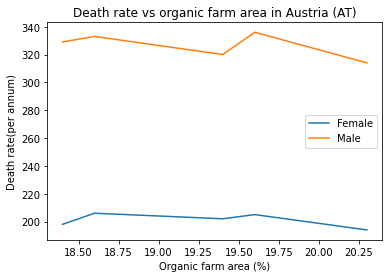

In [100]:
# Plot data

# Create line plots using Seaborn
sns.lineplot(data=AT_df, x="farm_area", y="female_death_rate", label="Female")
sns.lineplot(data=AT_df, x="farm_area", y="male_death_rate", label="Male")

# Add a title and axis labels
plt.title("Death rate vs organic farm area in Austria (AT)")
plt.xlabel("Organic farm area (%)")
plt.ylabel("Death rate(per annum)")

# Show the plot
plt.show()

The Death rate vs organic farm area in Austria (AT) plotted above shows some varying relationshp between death rate and organic farm area. For both the female and male (with similar curve pattern), the death rate increases with the increase in organic farm area at the beginning and then fluctuate a lot afterwards. However, it is obvious that the male death rate is more relative to the female.

#### FINLAND 'FI' ORGANIC & CANCER DATA

In [101]:
# Select 'FI'row from the dataframe
FI_row = organic_and_cancer.iloc[11]

# Split the row into three according to their categories
half1, half2, half3 = np.split(FI_row,3)

# Create a new dataframe with the above split and name them accordingly
FI_df = pd.DataFrame({'farm_area':half1, 'female_death_rate':half2, 'male_death_rate':half3})

# See outcome
FI_df

farm_area  female_death_rate  male_death_rate
2011         8.2              183.0            296.0
2012         8.6              182.0            289.0
2013         9.1              182.0            288.0
2014         9.3              178.0            283.0
2015         9.9              177.0            284.0

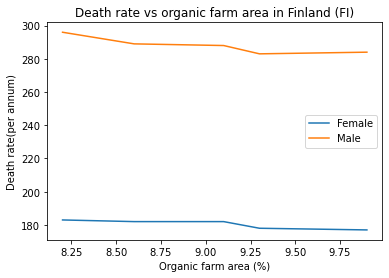

In [102]:
# Plot data

# Create the line plot using Seaborn
sns.lineplot(data=FI_df, x="farm_area", y="female_death_rate", label="Female")
sns.lineplot(data=FI_df, x="farm_area", y="male_death_rate", label="Male")

# Add a title and axis labels
plt.title("Death rate vs organic farm area in Finland (FI)")
plt.xlabel("Organic farm area (%)")
plt.ylabel("Death rate(per annum)")

# Show the plot
plt.show()


A quick glance at the graph above would show that the male death rate in Finland is more than the female. The plot also shows that the death rate for both genders decreases with the increase in the organic farm area.

#### ICELAND 'IS' ORGANIC & FEMALE CANCER DATA

In [103]:
# Select 'IS'row from the dataframe
IS_row = organic_and_cancer.iloc[16]

# Split the row into equal three according to their categories
half1, half2, half3 = np.split(IS_row,3)

# Create a new dataframe with the above split and name them accordingly
IS_df = pd.DataFrame({'farm_area':half1, 'female_death_rate':half2, 'male_death_rate':half3})

IS_df

farm_area  female_death_rate  male_death_rate
2011         1.0              220.0            316.0
2012         1.0              228.0            290.0
2013         0.5              221.0            290.0
2014         1.0              221.0            307.0
2015         1.4              224.0            275.0

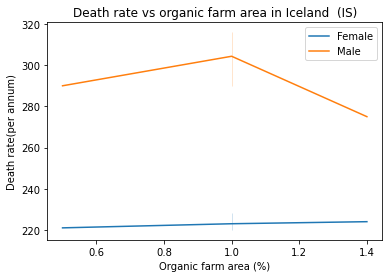

In [104]:
# Plot data

# Create the line plot using Seaborn
sns.lineplot(data=IS_df, x="farm_area", y="female_death_rate", label="Female")
sns.lineplot(data=IS_df, x="farm_area", y="male_death_rate", label="Male")

# Add a title and axis labelsb
plt.title("Death rate vs organic farm area in Iceland  (IS)")
plt.xlabel("Organic farm area (%)")
plt.ylabel("Death rate(per annum)")

# Show the plot
plt.show()


The death rate for male is obviously more relative to the female from the plot above. The male curve increases initially in death rate with increase in organic farm area and then decreases abruptly afterwards. However, the female curve shows a slightly steady increase in death rate with increase in the organic farm area.

#### THE NETHERLANDS 'NL' ORGANIC & FEMALE CANCER DATA

In [49]:
# Select 'NL'row from the dataframe
NL_row = organic_and_cancer.iloc[23]

# Split the row into equal three according to their categories
half1, half2, half3 = np.split(NL_row,3)

# Create a new dataframe with the above split and name them accordingly
NL_df = pd.DataFrame({'farm_area':half1, 'female_death_rate':half2, 'male_death_rate':half3})

NL_df

farm_area  female_death_rate  male_death_rate
2011         2.5              246.0            382.0
2012         2.6              241.0            382.0
2013         2.6              233.0            362.0
2014         2.7              232.0            356.0
2015         2.7              234.0            357.0

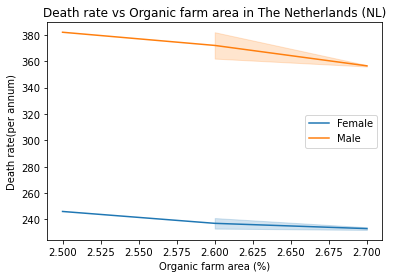

In [50]:
# Plot data

# Create the line plot using Seaborn
sns.lineplot(data=NL_df, x="farm_area", y="female_death_rate", label="Female")
sns.lineplot(data=NL_df, x="farm_area", y="male_death_rate", label="Male")

# Add a title and axis labels
plt.title("Death rate vs Organic farm area in The Netherlands (NL)")
plt.xlabel("Organic farm area (%)")
plt.ylabel("Death rate(per annum)")

# Show the plot
plt.show()


Again, the male curve above shows a higher value of death rate compared to the female. Nonetheless, the curve for both genders shows some slight decrease as the organic farm area increases. 

#### SERBIA 'RS' ORGANIC & FEMALE CANCER DATA 

In [51]:
# Select 'RS'row from the dataframe
RS_row = organic_and_cancer.iloc[28]

# Split the row into equal three according to their categories
half1, half2, half3 = np.split(RS_row,3)

# Create a new dataframe with the above split and name them accordingly
RS_df = pd.DataFrame({'farm_area':half1, 'female_death_rate':half2, 'male_death_rate':half3})

RS_df

farm_area  female_death_rate  male_death_rate
2011         0.3              229.0            393.0
2012         0.3              233.0            392.0
2013         0.2              228.0            391.0
2014         0.3              232.0            386.0
2015         0.4              226.0            391.0

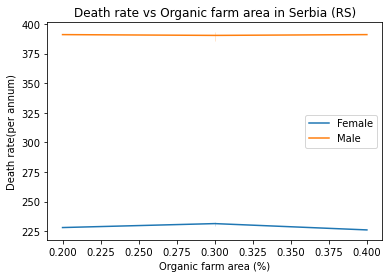

In [52]:
# Plot data

# Create the line plot using Seaborn
sns.lineplot(data=RS_df, x="farm_area", y="female_death_rate", label="Female")
sns.lineplot(data=RS_df, x="farm_area", y="male_death_rate", label="Male")

# Add a title and axis labels
plt.title("Death rate vs Organic farm area in Serbia (RS)")
plt.xlabel("Organic farm area (%)")
plt.ylabel("Death rate(per annum)")

# Show the plot
plt.show()

The male curve maintains the lead with higher death rate relative to the female. Nonetheless, the female curve increases slightly and then decreases again as the organic farm area increase. The male curve almost maintains a conStant death rate with increase in organic farm area.

## FINAL REMARK

From the plot of the five countries, it was observed that there is no direct/indirect relation between organic farm area and the death rate resulting from cancer for both female and male genders as they varied inconsistently. Of course other factors (other than organic agricultural product) play some roles in the death rate resulting from cancer globally. Nevertheless, the death rate for the male maintained all time high relative to the female in these countries.